In [87]:
import torch

### Scalars

In [88]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

In [89]:
x + y, x - y, x * y, x / y, x**y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

### Vectors

In [90]:
x = torch.arange(3)
x

tensor([0, 1, 2])

By default, we visualize vectors by stacking their elements vertically.

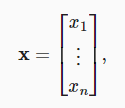

We can also distinguish between such column vectors and row vectors whose elements are stacked horizontally.

In [91]:
x[2]

tensor(2)

In [92]:
len(x)

3

In [93]:
x.shape

torch.Size([3])

The shape is a tuple that indicates a tensor’s length along each axis. Tensors with just one axis have shapes with just one element.

### Matrices

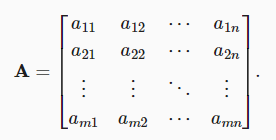

Visually, we can illustrate any matrix as a table. To refer to an individual element, we subscript both the row and column indices, e.g., **a<sub>ij</sub>** is the value that belongs to **A**’s **i<sup>th</sup>** row and **j<sup>th</sup>** column:

In [94]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes we want to flip the axes. When we exchange a matrix’s rows and columns, the result is called its transpose. 

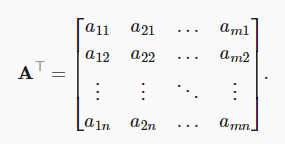


In [95]:
# You can access matrix's transpose:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [96]:
# Symmetric matrices are the subset of square matrices that are equal to their own transposes:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
print(A)
A == A.T

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Matrices are useful for representing datasets. Typically, **rows correspond to individual records and columns correspond to distinct attributes.**

### Basic properties of tensor arithmetic

In [97]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone() # Assign a copy o A to B - allocating new memory
A, B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0., 1., 2.],
         [3., 4., 5.]]))

In [98]:
# Addition
A + B

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [99]:
# Subtraction
A - B

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [100]:
# Hadamard product (each element by each)
A * B, A.multiply(B)

(tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]),
 tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]))

In [101]:
# Tensor multiplied by scalar
A * 2

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [102]:
# Scalar addition
A + 0.1

tensor([[0.1000, 1.1000, 2.1000],
        [3.1000, 4.1000, 5.1000]])

In [103]:
# The behaviour vary - in this case it is a Matrix multiplication
# Matrix multiplication - https://en.wikipedia.org/wiki/Matrix_multiplication
# behaviour of the matmul function - https://pytorch.org/docs/stable/generated/torch.matmul.html
A.matmul(B.T)

# In this example if yoy calculate this on paper, result matrix will be 3x3 with 3rd column/3rd row filled with zeros,
# but pytorch, after the matrix multiply, is removing the prepended dimension.

tensor([[ 5., 14.],
        [14., 50.]])

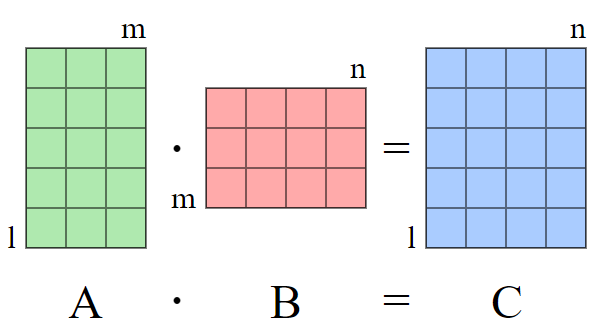

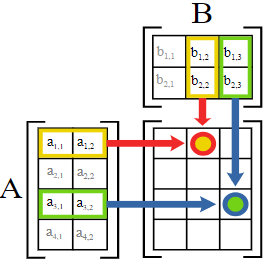


c<sub>11</sub> = a<sub>11</sub> * b<sub>11</sub> + a<sub>12</sub> * b<sub>21</sub> + a<sub>13</sub> * b<sub>31</sub>

c<sub>12</sub> = a<sub>11</sub> * b<sub>12</sub> + a<sub>12</sub> * b<sub>22</sub> + a<sub>13</sub> * b<sub>32</sub>

etc.

In [104]:
# 3 dimentional tensor
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [105]:
X + 0.1, (X + 0.1).shape

(tensor([[[ 0.1000,  1.1000,  2.1000,  3.1000],
          [ 4.1000,  5.1000,  6.1000,  7.1000],
          [ 8.1000,  9.1000, 10.1000, 11.1000]],
 
         [[12.1000, 13.1000, 14.1000, 15.1000],
          [16.1000, 17.1000, 18.1000, 19.1000],
          [20.1000, 21.1000, 22.1000, 23.1000]]]),
 torch.Size([2, 3, 4]))

In [106]:
X * 0.1, (X * 0.1).shape

(tensor([[[0.0000, 0.1000, 0.2000, 0.3000],
          [0.4000, 0.5000, 0.6000, 0.7000],
          [0.8000, 0.9000, 1.0000, 1.1000]],
 
         [[1.2000, 1.3000, 1.4000, 1.5000],
          [1.6000, 1.7000, 1.8000, 1.9000],
          [2.0000, 2.1000, 2.2000, 2.3000]]]),
 torch.Size([2, 3, 4]))

### Reduction (sum, mean)

In [107]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [108]:
A, A.shape, A.sum()

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.))

In [109]:
# By default, invoking the sum function reduces a tensor along all of its axes, eventually producing a scalar.
# Libraries also allow us to specify the axes along which the tensor should be reduced.

A, A.shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]))

In [110]:
# To sum over all elements along the rows (axis 0), we specify axis=0 in sum. 
A.sum(axis=0), A.sum(axis=0).shape

(tensor([3., 5., 7.]), torch.Size([3]))

In [111]:
# 3x3 matrix
# axis=1 will reduce dimention (axis 1) by summing all columns ()
O = torch.arange(9).reshape(3, 3)
O, O.sum(axis=1)

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([ 3, 12, 21]))

In [112]:
# 2x3x4 dimentional tensor
X, X.shape, X.sum(axis=0)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 torch.Size([2, 3, 4]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]))

- In 2-dimentional tensor - axis 0 direction is to the bottom, axis 1 direction is to the right
- In 3-dimentional tensor - axis 0 direction is to the back, axis 1 direction is to the bottom, axis 2 direction is to the right

In [113]:
# (axis=[0, 1]) is the same as sum()
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [114]:
# mean quantity (avarage) function behaves analogously to sum.
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [115]:
A, A.mean(axis=0)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([1.5000, 2.5000, 3.5000]))

In [116]:
A.mean(axis=0), (A.mean(axis=0) == A.sum(axis=0) / A.shape[0])

(tensor([1.5000, 2.5000, 3.5000]), tensor([True, True, True]))

### Non-reduction sum

Sometimes it can be useful to keep the number of axes unchanged when invoking the function for calculating the sum or mean. This matters when we want to use the broadcast mechanism.

In [117]:
A, A.sum(axis=1), A.sum(axis=1).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([ 3., 12.]),
 torch.Size([2]))

In [118]:
sum_A = A.sum(axis=1, keepdim=True)
sum_A, sum_A.shape


(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [119]:
# example - since sum_A keeps its two axes after summing each row, we can divide A by sum_A with broadcasting to create a matrix where each row sums up to 1
# broadcasting is done automatically by pytorch
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [120]:
# cumulative sum of elements on selected axis, this is not reducting the tensor axises by default
O, O.cumsum(axis=0)

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[ 0,  1,  2],
         [ 3,  5,  7],
         [ 9, 12, 15]]))

### Dot products

In [121]:
y = torch.ones(3, dtype=torch.float32)
x, y, x * y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor([0., 1., 2.]), tensor(3.))

In [122]:
torch.sum(x * y) == torch.dot(x, y)

tensor(True)

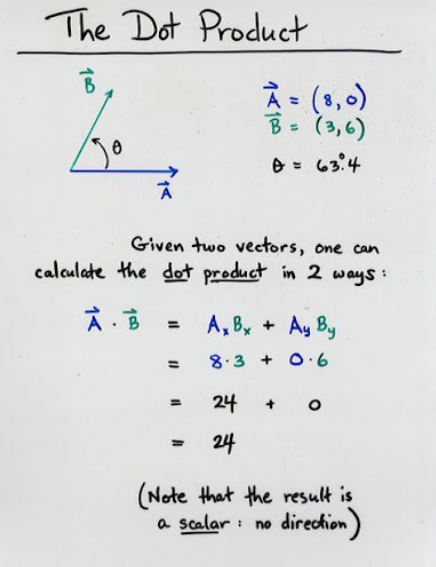

Dot (scalar) products and cross (vector) products are **not** the same.
Result of dot (scalar) products is scalar, result of cross (vector) products is vector.

([explanation in pl](https://www.youtube.com/watch?v=MMyZdj_ab3U))

In very big simplification:
- **dot product** is telling how much vectors are **parallel** to each other
- **cross product** is telling how much vectors are **perpendicular** to each other

### Matrix-Vector Products

Matrix–vector products describe the key calculation involved in computing the outputs of each layer in a neural network given the outputs from the previous layer.

In [123]:
A, x

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]))

In [124]:
A.shape, x.shape

(torch.Size([2, 3]), torch.Size([3]))

In [125]:
# Python has a convenience operator @ that can execute both matrix–vector and matrix–matrix products (depending on its arguments). Thus we can write A@x.
# In result we will have a vector of a length of a total rows of the previous matrix.

torch.mv(A, x), A@x

(tensor([ 5., 14.]), tensor([ 5., 14.]))

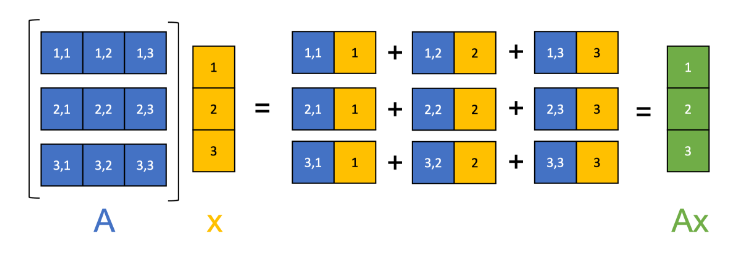

Note that the column dimension of A (its length along axis 1) must be the same as the dimension of x (its length), so number of columns (must) == length of the vector.

In result length of the Ax == number of rows of matrix A

### Matrix-Matrix Multiplication

Already mentioned in **Basic properties of tensor arithmetic**

The term matrix–matrix multiplication is often simplified to matrix multiplication, and should not be confused with the Hadamard product.

In [126]:
# The behaviour vary - in this case it is a Matrix multiplication
# Matrix multiplication - https://en.wikipedia.org/wiki/Matrix_multiplication
# behaviour of the matmul function - https://pytorch.org/docs/stable/generated/torch.matmul.html
A.matmul(B.T)

# In this example if you calculate this on paper, result matrix will be 3x3 with 3rd column/3rd row filled with zeros,
# but pytorch, after the matrix multiply, is removing the prepended dimension.

tensor([[ 5., 14.],
        [14., 50.]])

In [127]:
# Other ways to invoke MxM multiplication

torch.mm(A, B.T), A@B.T

(tensor([[ 5., 14.],
         [14., 50.]]),
 tensor([[ 5., 14.],
         [14., 50.]]))

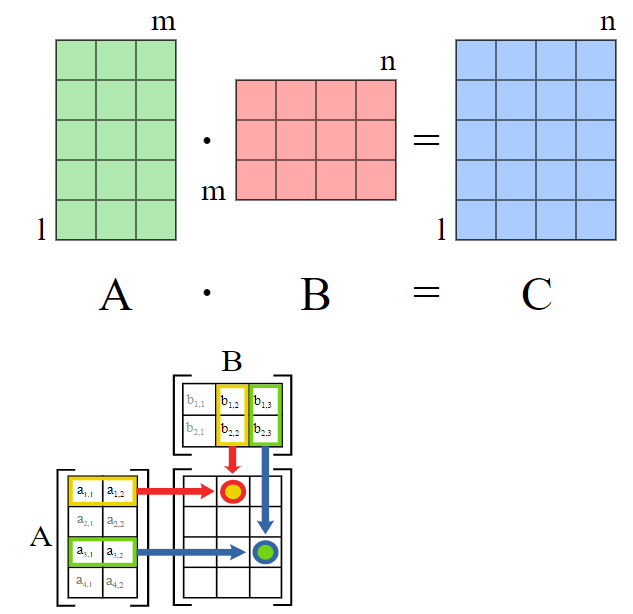


c<sub>11</sub> = a<sub>11</sub> * b<sub>11</sub> + a<sub>12</sub> * b<sub>21</sub> + a<sub>13</sub> * b<sub>31</sub>

c<sub>12</sub> = a<sub>11</sub> * b<sub>12</sub> + a<sub>12</sub> * b<sub>22</sub> + a<sub>13</sub> * b<sub>32</sub>

etc.

### Norms

Some of the most useful operators in linear algebra are norms.
Many functions are valid norms and different norms encode different notions of size. Example of norm is the square root of the sum of squares of a vector’s elements when calculating the hypotenuse of a right triangle. Formally, this is called the **l<sub>2</sub>**norm and expressed as:

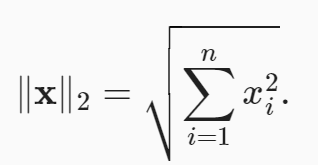

In [130]:
# pytorch "norm" function is l2 norm

u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

the l<sub>1</sub> norm sums the absolute values of a vector’s elements:

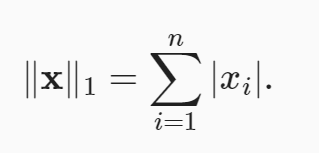

In [131]:
# l1
torch.abs(u).sum()

tensor(7.)

**Frobenius norm** defined as the square root of the sum of the squares of a matrix’s elements:

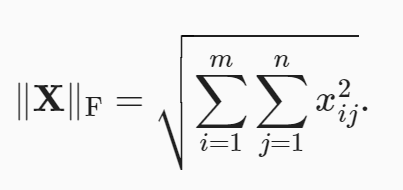

In [132]:
ones_m = torch.ones((4, 9))
ones_m

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [133]:
torch.norm(ones_m)

tensor(6.)

In deep learning, we are often trying to solve optimization problems: maximize the probability assigned to observed data; maximize the revenue associated with a recommender model; minimize the distance between predictions and the ground truth observations; minimize the distance between representations of photos of the same person while maximizing the distance between representations of photos of different people.

That's why these cncepts are useful - **for optimisation**.